# Lab 6
## Concrete Slump Test
### 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from pandas.plotting import scatter_matrix


In [2]:
data = pd.read_csv('slump_test.data')
print('Exploy the first five line of the data:\n')
data.head()


Exploy the first five line of the data:



,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
#Our interest is the 28-day Compressive Strength output
data = data.drop(columns=['No']).drop(columns=['SLUMP(cm)']).drop(columns=['FLOW(cm)'])

print("Basic information of the data:\n")
data.info()

missing_values = data.isnull().sum()
print("Check the missing data:\n")
print(missing_values)


Basic information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB
Check the missing data:

Cement                                0
Slag                                  0
Fly ash                               0
Water                        

Plot the histogram


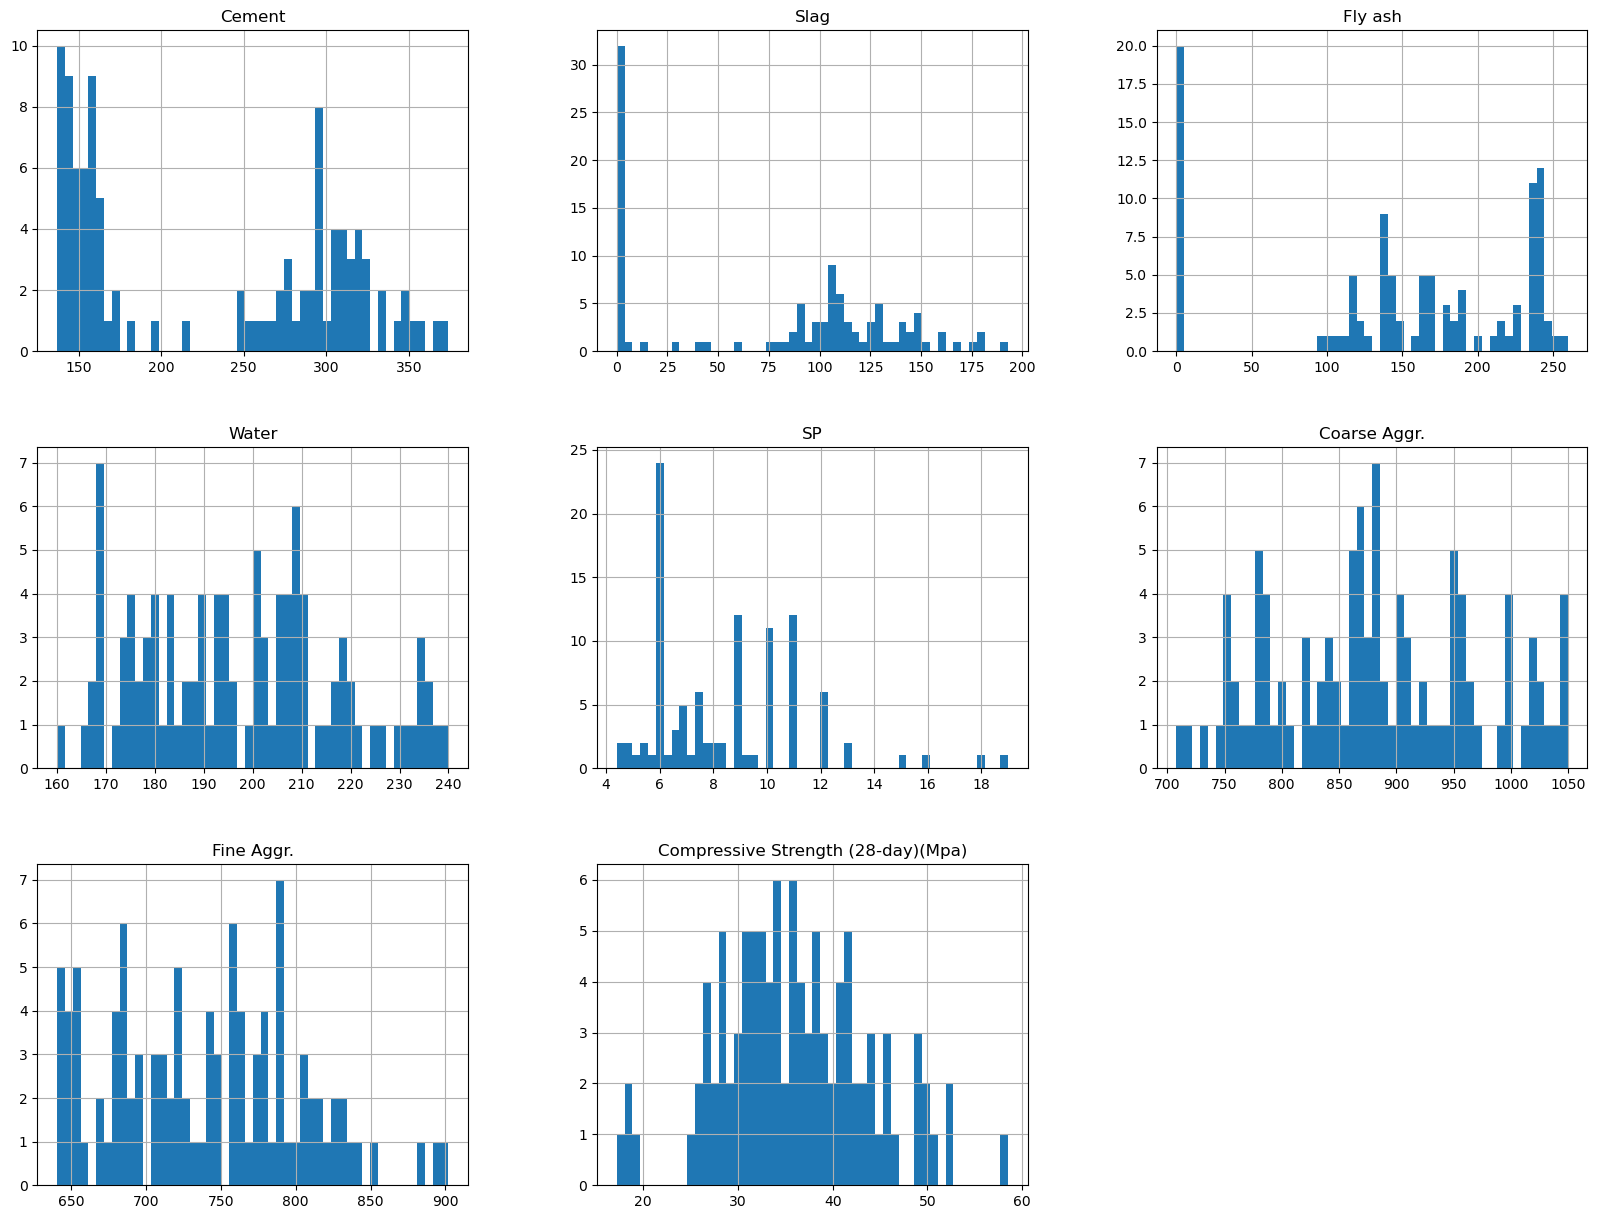

In [4]:
print("Plot the histogram")
data.hist(bins = 50, figsize=(20, 15))
plt.show()

In [5]:
# Check Unreasonable 0
for col in data.columns:
    print(f"{col}: {(data[col]==0).sum()}")


Cement: 0
Slag: 26
Fly ash: 20
Water: 0
SP: 0
Coarse Aggr.: 0
Fine Aggr.: 0
Compressive Strength (28-day)(Mpa): 0


Plot the scatter diagram 


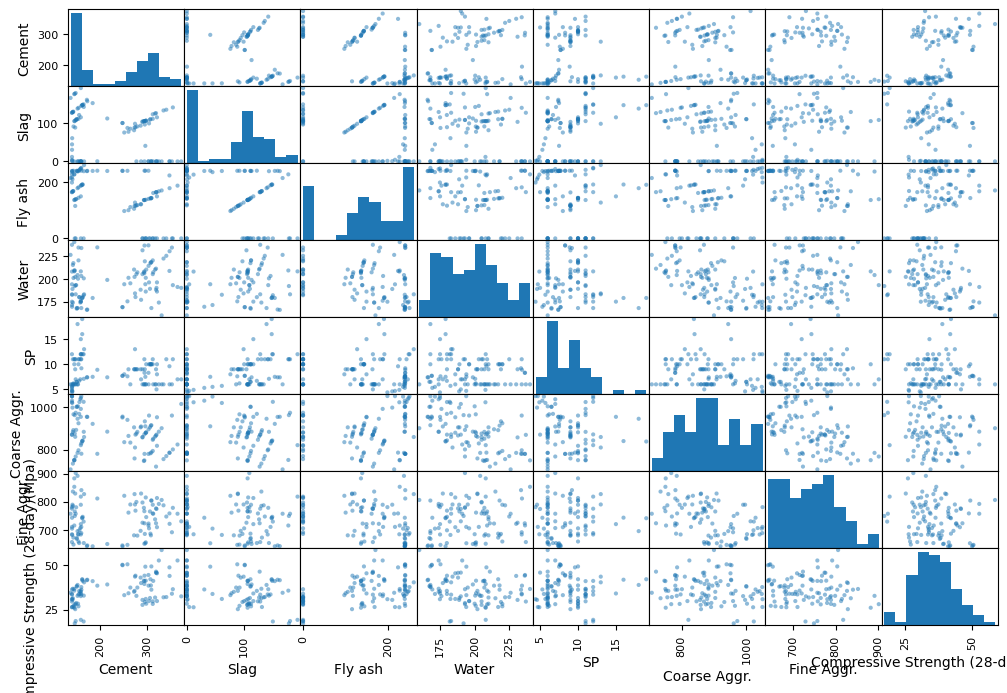

In [6]:
print("Plot the scatter diagram ")
scatter_matrix(data, figsize=(12, 8))
plt.show()

## 2

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split feature and target
X = data.drop(columns=['Compressive Strength (28-day)(Mpa)'])
y = data['Compressive Strength (28-day)(Mpa)']

# Split data 8/2 first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state =42
)

# Scalering data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # 用训练集的均值/方差
X_test = scaler.transform(X_test) # 用训练集的均值/方差

In [8]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR

svr =  SVR()
lr = LinearRegression()
sgd = SGDRegressor()

voting_reg = VotingRegressor(estimators=[
    ('svr',svr),
    ('lr',lr),
    ('sgd',sgd)
])

# fit data
voting_reg.fit(X_train, y_train)
svr.fit(X_train, y_train)
lr.fit(X_train, y_train)
sgd.fit(X_train, y_train)

SGDRegressor()

## 3

In [9]:
y_test_pred_vote =  voting_reg.predict(X_test)
y_test_pred_svr =  svr.predict(X_test)
y_test_pred_lr =  lr.predict(X_test)
y_test_pred_sgd =  sgd.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE_voting', mean_squared_error(y_test, y_test_pred_vote))
print('MSE_svr', mean_squared_error(y_test, y_test_pred_svr))
print('MSE_lr', mean_squared_error(y_test, y_test_pred_lr))
print('MSE_sgd', mean_squared_error(y_test, y_test_pred_sgd))

MSE_voting 6.539812612878731
MSE_svr 23.174702103531576
MSE_lr 4.278786882055948
MSE_sgd 4.243394519311272


In [10]:
y_train_pred_vote =  voting_reg.predict(X_train)
y_train_pred_svr =  svr.predict(X_train)
y_train_pred_lr =  lr.predict(X_train)
y_train_pred_sgd =  sgd.predict(X_train)

from sklearn.metrics import mean_squared_error
print('MSE_train_voting', mean_squared_error(y_train, y_train_pred_vote))
print('MSE_train_svr', mean_squared_error(y_train, y_train_pred_svr))
print('MSE_train_lr', mean_squared_error(y_train, y_train_pred_lr))
print('MSE_train_sgd', mean_squared_error(y_train, y_train_pred_sgd))

MSE_train_voting 8.939790496989048
MSE_train_svr 29.398483534160604
MSE_train_lr 6.893743324982875
MSE_train_sgd 6.916756882249528


对比分析
1. 训练集MSE > 测试集MSE
你的大部分模型出现了测试集MSE比训练集MSE还小的情况（比如Voting、Linear、SGD）。
这种情况不常见，但不是不可能，通常有这几种原因：

样本划分的偶然性：测试集划分时，刚好测试集的样本难度比较低，或者分布与训练集略有不同（一般是运气好）。

样本量较小：数据集较小时，样本波动大，更容易出现这种偶发情况。

数据集分布较均匀/简单：本身是一个容易拟合的数据集（比如线性关系很强），模型在训练集和测试集上的表现非常接近甚至略好于训练集。

数据泄漏（你前面的流程是规范的，所以应该不是这个问题）

2. 过拟合和欠拟合的判断
你的模型都不是过拟合！
过拟合：训练集MSE远小于测试集MSE。

欠拟合：训练集和测试集MSE都很大。

你的训练集和测试集MSE都很接近，甚至test还更小，说明模型泛化能力很强、没有过拟合，数据处理得当。

VotingRegressor略微欠拟合
训练MSE（8.96）略高于Test（6.55），这可能是模型偏差较大（偏弱/保守）。

但两个MSE都很小，模型还是有效的。

SVR表现最差
训练和测试都很高（29左右），说明SVR不适合你的数据，可能是参数设置不合适或本身特征关系更偏线性。

## Abalone dataset
### 1